In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/songs_normalize.csv")

In [ ]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


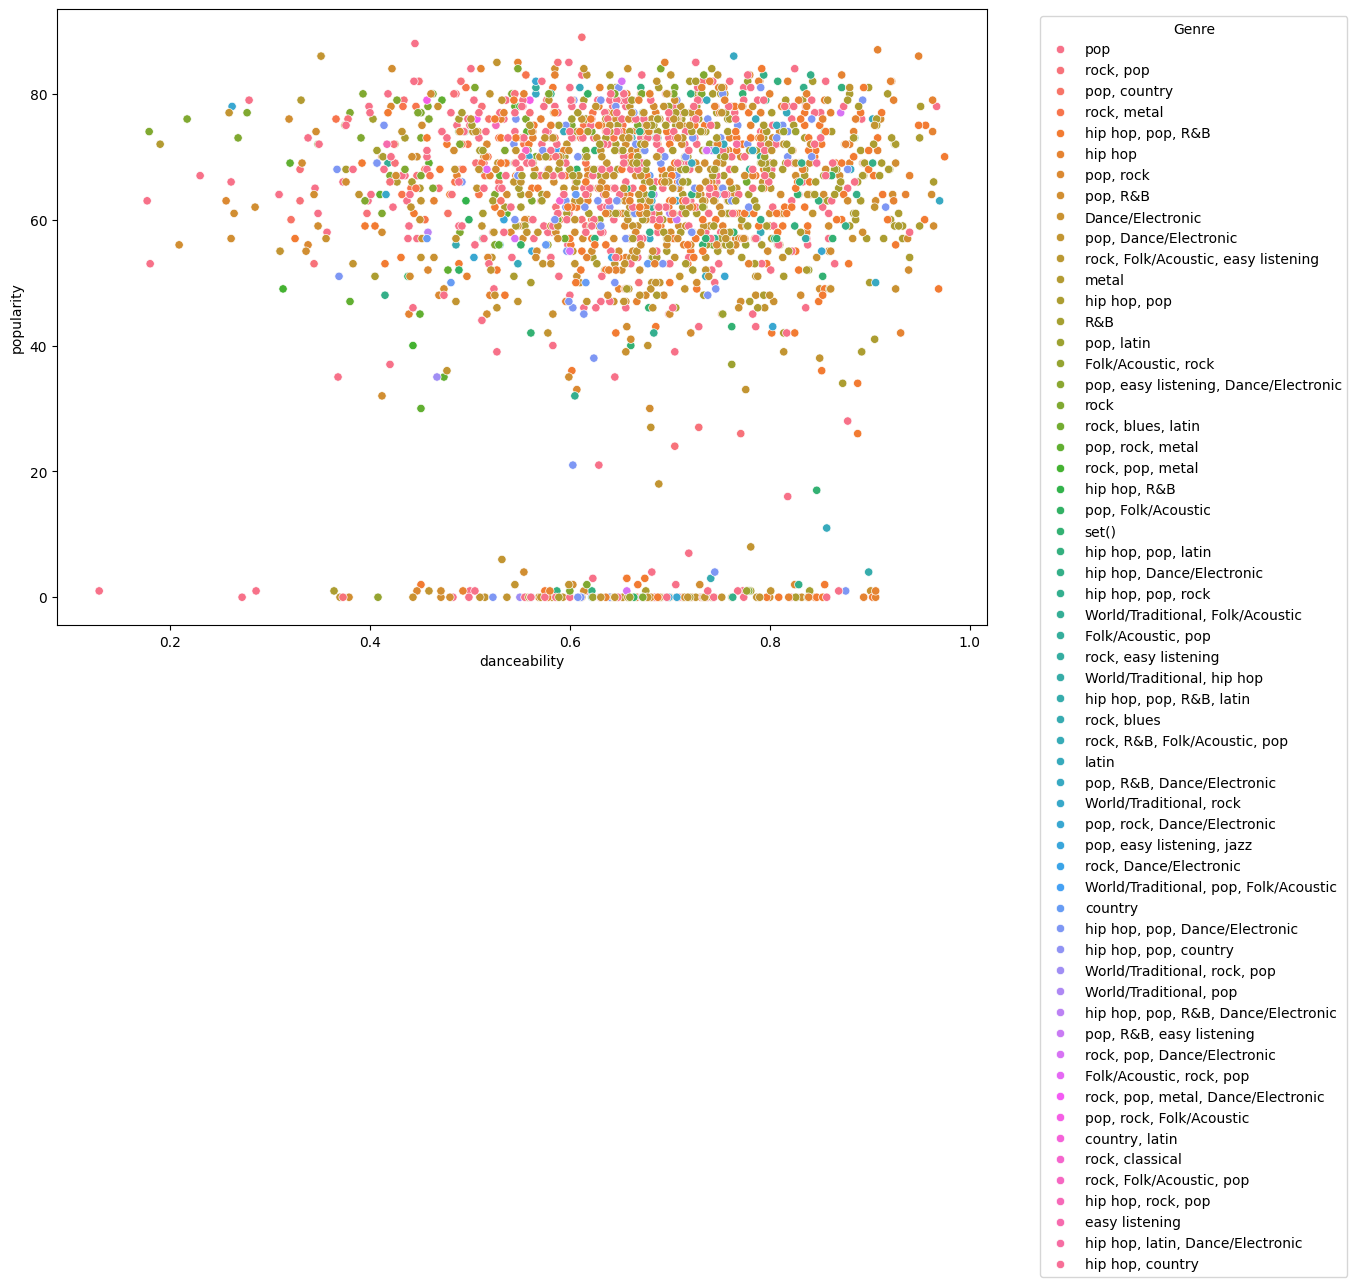

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'danceability', y = 'popularity', hue = 'genre', data=df)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)



In [ ]:
popularity_danceability = df.groupby('genre')[['popularity', 'danceability']].mean()

sorted_popularity_danceability = popularity_danceability.sort_values(by = ['popularity', 'danceability'], ascending = False)

print("Top genres based on popularity and danceability:")
print(sorted_popularity_danceability.head(10))


Top genres based on popularity and danceability:
                                    popularity  danceability
genre                                                       
pop, rock, Folk/Acoustic             79.000000      0.508500
Folk/Acoustic, pop                   78.000000      0.563000
rock, pop, metal, Dance/Electronic   76.000000      0.507000
hip hop, rock, pop                   75.000000      0.526000
hip hop, latin, Dance/Electronic     72.000000      0.767000
metal                                72.000000      0.473444
easy listening                       72.000000      0.417000
rock, Folk/Acoustic, pop             71.000000      0.556000
rock, metal                          70.921053      0.537474
hip hop, country                     69.000000      0.847000


In [ ]:
unique_values_count = df['genre'].nunique()

print(f"Number of different types of variables in column 'genre': {unique_values_count}")


Number of different types of variables in column 'genre': 59


In [ ]:
data = pd.DataFrame(df['genre'].value_counts())
data

,count
genre,
pop,428
"hip hop, pop",277
"hip hop, pop, R&B",244
"pop, Dance/Electronic",221
"pop, R&B",178
hip hop,124
"hip hop, pop, Dance/Electronic",78
rock,58
"rock, pop",43


In [ ]:
genre_counts = df['genre'].value_counts()
genres_to_group = genre_counts[genre_counts < 75].index

df['genre'] = df['genre'].replace(genres_to_group, 'Other')

genre_grouped = df['genre'].value_counts()

print(genre_grouped)


genre
Other                             450
pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
Name: count, dtype: int64


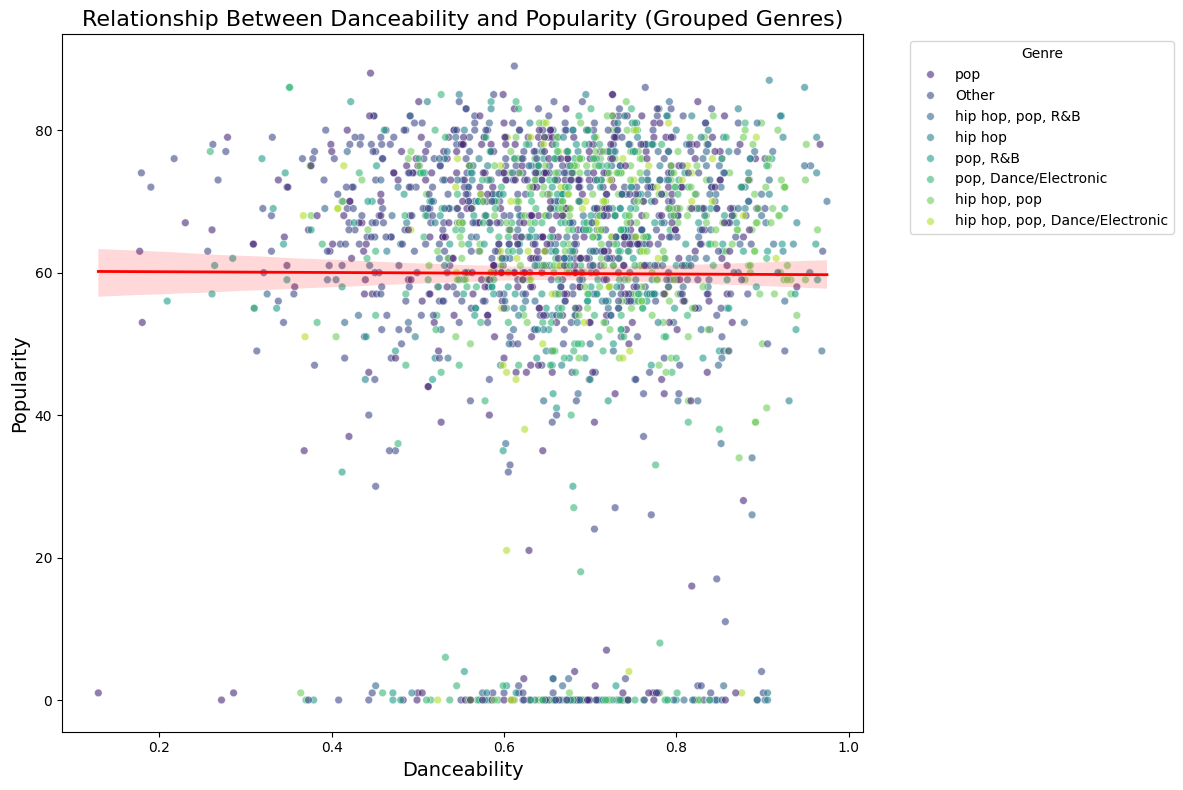

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filtered_data = df[['danceability', 'popularity', 'genre']].dropna() ## dropping columns with missing values

## new addition - grouping smaller groups --> better concentrated
genre_counts = filtered_data['genre'].value_counts()
threshold = 10  ## threshold for grouping smaller categories
filtered_data['genre_grouped'] = filtered_data['genre'].apply(
    lambda x: x if genre_counts[x] > threshold else 'other'
)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_data
    x='danceability',
    y='popularity',
    hue='genre_grouped',
    palette='viridis',
    alpha=0.6,
    s=30
)

sns.regplot(
    data=filtered_data,
    x='danceability',
    y='popularity',
    scatter=False,  # Don't plot the scatter points again
    line_kws={'color': 'red', 'lw': 2}  # Customize the regression line
)

plt.title('Relationship Between Danceability and Popularity (Grouped Genres)', fontsize=16)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('danceability_vs_popularity.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
danceability_threshold = 0.7
popularity_threshold = 70

high_danceability_popularity = filtered_data[(filtered_data['danceability'] > danceability_threshold) &
                               (filtered_data['popularity'] > popularity_threshold)]

high_dance_pop_genre_counts = high_danceability_popularity['genre_grouped'].value_counts()

print(high_dance_pop_genre_counts)


genre_grouped
hip hop, pop                      61
pop                               59
Other                             42
hip hop, pop, R&B                 41
hip hop                           40
pop, Dance/Electronic             23
hip hop, pop, Dance/Electronic    13
pop, R&B                          11
Name: count, dtype: int64


1. Is there a positive correlation between danceability and popularity?

  As seen on the graph, the distribution of data points on the scatter plot and the regression line do not show much correlation between danceability and popularity, as most points are concentrated in the upper-right quadrant of the graph, with few observations in the lower-right bottom. With the regression line being nearly horizontal, it shows that popularity and danceability do not have a linear relationship.

  Despite the lack of an obvious correlation between the two, we can still say that most of the songs with high popularity also have high danceability, as the data points are most concentrated in the upper-right quadrant of the graph.

2. Do specific genres dominate the high-danceability, high-popularity range?

   From the graph, we can observe that the dots of different colors are widely spread, with various colored dots scattered across the plot. To check which genres dominate in high-danceability and high-popularity, I set the threshold of 0.7 for danceability and 70 for popularity, which are regarded as high danceability and high popularity, respectively. It was found that two genres, 'hip hop, pop' and 'pop', dominate.